Salt bridges saved to /home/hp/nayanika/github/GPX6/table/salt_bridges_human.txt


/tmp/ipykernel_37416/893249565.py:103: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Heatmap saved to /home/hp/nayanika/github/GPX6/figures/salt_bridge_heatmap_humansec.png


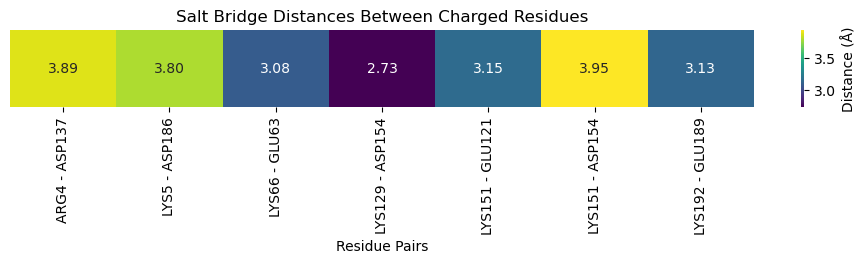

In [21]:
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def find_salt_bridges(pdb_file, cutoff=4.0):
    """
    Identify ion pairs and salt bridges between oppositely charged residues.
    
    Parameters:
    pdb_file (str): Path to the PDB file.
    cutoff (float): Distance cutoff for identifying salt bridges in Angstroms.
    
    Returns:
    list: List of dictionaries containing pairs of residues in salt bridges.
    """
    # Initialize PDB parser
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    
    # Define charged residues and their charged atoms
    positively_charged = {'LYS': 'NZ', 'ARG': 'NH1', 'HIS': 'ND1'}
    negatively_charged = {'ASP': 'OD1', 'GLU': 'OE1'}
    
    # List to store identified salt bridges
    salt_bridges = []
    
    # Loop over all chains and residues to find salt bridges
    for chain in structure[0]:
        for pos_res in chain:
            if pos_res.resname in positively_charged:
                pos_atom = pos_res[positively_charged[pos_res.resname]]
                
                for neg_res in chain:
                    if neg_res == pos_res or neg_res.resname not in negatively_charged:
                        continue
                    neg_atom = neg_res[negatively_charged[neg_res.resname]]
                    
                    # Calculate distance between charged atoms
                    distance = pos_atom - neg_atom
                    if distance <= cutoff:
                        salt_bridges.append({
                            'pos_res': f"{pos_res.resname}{pos_res.id[1]}",
                            'neg_res': f"{neg_res.resname}{neg_res.id[1]}",
                            'chain': chain.id,
                            'distance': round(distance, 2)
                        })
    
    return salt_bridges

def save_salt_bridges_to_file(salt_bridges, file_path, file_format="csv"):
    """
    Save salt bridge data to a file in CSV or TXT format.
    
    Parameters:
    salt_bridges (list): List of salt bridges with position and distance information.
    file_path (str): Path to save the file.
    file_format (str): Format of the file ('csv' or 'txt').
    """
    # Convert the list of salt bridges to a DataFrame
    df = pd.DataFrame(salt_bridges)
    
    if file_format == "csv":
        df.to_csv(file_path, index=False)
        print(f"Salt bridges saved to {file_path}")
    elif file_format == "txt":
        df.to_csv(file_path, sep='\t', index=False)
        print(f"Salt bridges saved to {file_path}")
    else:
        raise ValueError("Unsupported file format. Use 'csv' or 'txt'.")

def plot_salt_bridges_heatmap(salt_bridges, save_path=None):
    """
    Plot and optionally save a heatmap showing distances between residues in salt bridges.
    
    Parameters:
    salt_bridges (list): List of salt bridges with position and distance information.
    save_path (str, optional): Path to save the heatmap image. Defaults to None.
    """
    if not salt_bridges:
        print("No salt bridges found to plot")
        return
    
    # Prepare data for heatmap
    residue_pairs = [f"{bridge['pos_res']} - {bridge['neg_res']}" for bridge in salt_bridges]
    distances = [bridge['distance'] for bridge in salt_bridges]
    
    # Create a DataFrame for the heatmap
    data = pd.DataFrame({'Residue_Pairs': residue_pairs, 'Distance': distances})
    data.set_index('Residue_Pairs', inplace=True)
    
    # Since we have a single column, pivot for display as a 2D array
    heatmap_data = pd.DataFrame(data['Distance']).T  # Transpose for single row
    
    # Plot heatmap
    plt.figure(figsize=(12, 1))  # Adjust height for single row
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="viridis", cbar_kws={'label': 'Distance (Å)'})
    plt.title("Salt Bridge Distances Between Charged Residues")
    plt.xlabel("Residue Pairs")
    plt.yticks([], [])  # Hide y-axis as we have only one row
    plt.xticks(rotation=90)
    plt.tight_layout()
    
    # Save plot if save_path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Heatmap saved to {save_path}")
    
    plt.show()

# Specify the PDB file path
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_humansec.pdb"

# Find salt bridges
salt_bridges = find_salt_bridges(pdb_file)

# Save salt bridges to a TXT file
txt_path = "/home/hp/nayanika/github/GPX6/table/salt_bridges_human.txt"
save_salt_bridges_to_file(salt_bridges, txt_path, file_format="txt")

# Specify the save path for the heatmap image
heatmap_path = "/home/hp/nayanika/github/GPX6/figures/salt_bridge_heatmap_humansec.png"

# Plot and save the heatmap
plot_salt_bridges_heatmap(salt_bridges, save_path=heatmap_path)


Distance between PRO and GLN: 3.87 Å
Distance between PRO and ASN: 5.64 Å
Distance between PRO and ARG: 6.64 Å
Distance between PRO and LYS: 10.29 Å
Distance between PRO and VAL: 13.06 Å
Distance between PRO and ASP: 16.80 Å
Distance between PRO and CYX: 19.81 Å
Distance between PRO and ASN: 22.88 Å
Distance between PRO and LYS: 26.01 Å
Distance between PRO and GLY: 28.13 Å
Distance between PRO and VAL: 28.45 Å
Distance between PRO and THR: 32.10 Å
Distance between PRO and GLY: 33.44 Å
Distance between PRO and THR: 31.86 Å
Distance between PRO and ILE: 30.41 Å
Distance between PRO and TYR: 33.71 Å
Distance between PRO and GLU: 35.70 Å
Distance between PRO and TYR: 35.08 Å
Distance between PRO and GLY: 36.15 Å
Distance between PRO and ALA: 35.79 Å
Distance between PRO and LEU: 37.51 Å
Distance between PRO and THR: 36.26 Å
Distance between PRO and LEU: 35.17 Å
Distance between PRO and ASN: 38.14 Å
Distance between PRO and GLY: 40.10 Å
Distance between PRO and GLU: 42.41 Å
Distance betwee

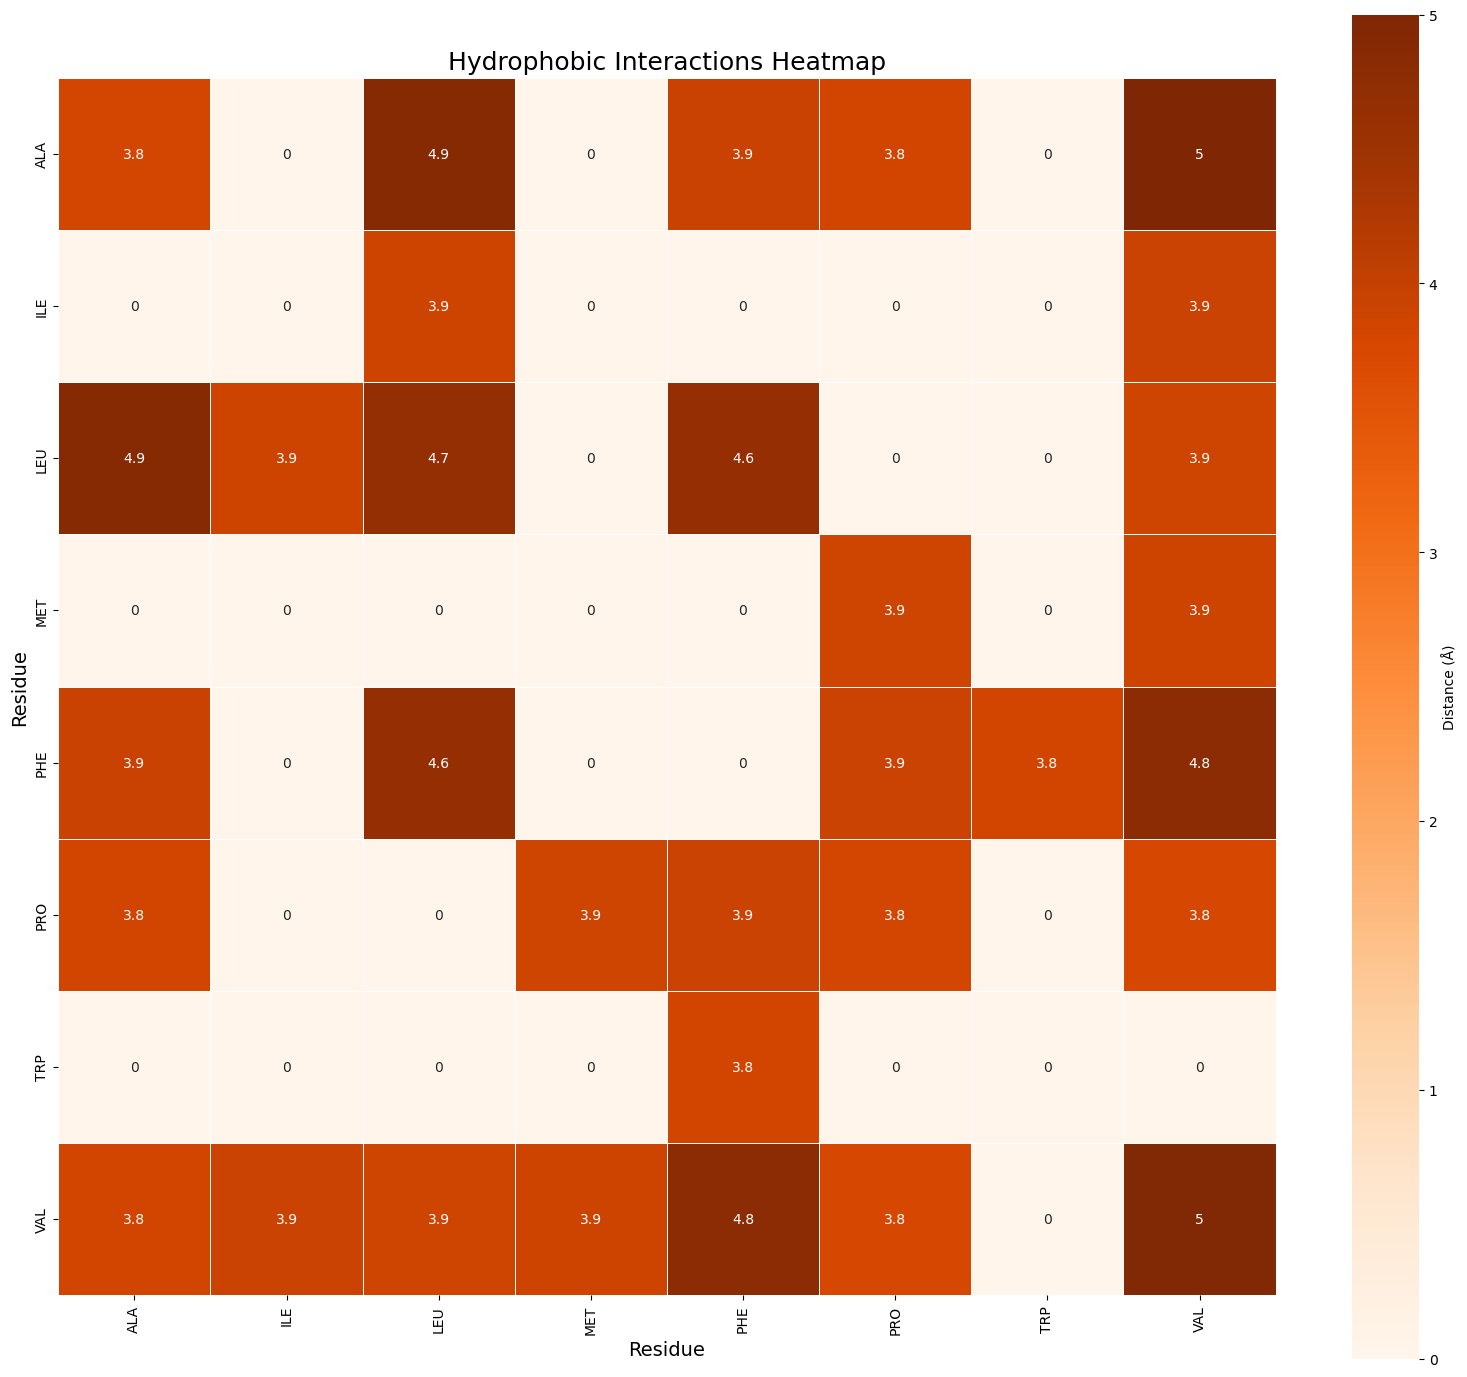

Residue list: ['ASN', 'CYS', 'GLN', 'SER', 'THR', 'TYR']
Residue to index mapping: {'ASN': 0, 'CYS': 1, 'GLN': 2, 'SER': 3, 'THR': 4, 'TYR': 5}
Matrix update: (GLN, ASN) = 3.86 Å
Matrix update: (GLN, TYR) = 4.74 Å
Matrix update: (GLN, SER) = 3.96 Å
Matrix update: (GLN, THR) = 4.65 Å
Matrix update: (ASN, GLN) = 3.86 Å
Matrix update: (ASN, SER) = 3.94 Å
Matrix update: (ASN, CYS) = 3.80 Å
Matrix update: (ASN, THR) = 3.93 Å
Matrix update: (TYR, GLN) = 3.86 Å
Matrix update: (CYS, ASN) = 3.80 Å
Matrix update: (THR, ASN) = 3.93 Å
Matrix update: (THR, SER) = 5.00 Å
Matrix update: (THR, GLN) = 4.65 Å
Matrix update: (SER, ASN) = 3.94 Å
Matrix update: (SER, THR) = 5.00 Å
Matrix update: (SER, SER) = 3.90 Å
Matrix update: (SER, GLN) = 3.96 Å
Heatmap saved as hydrophilic_2d_heatmap.png


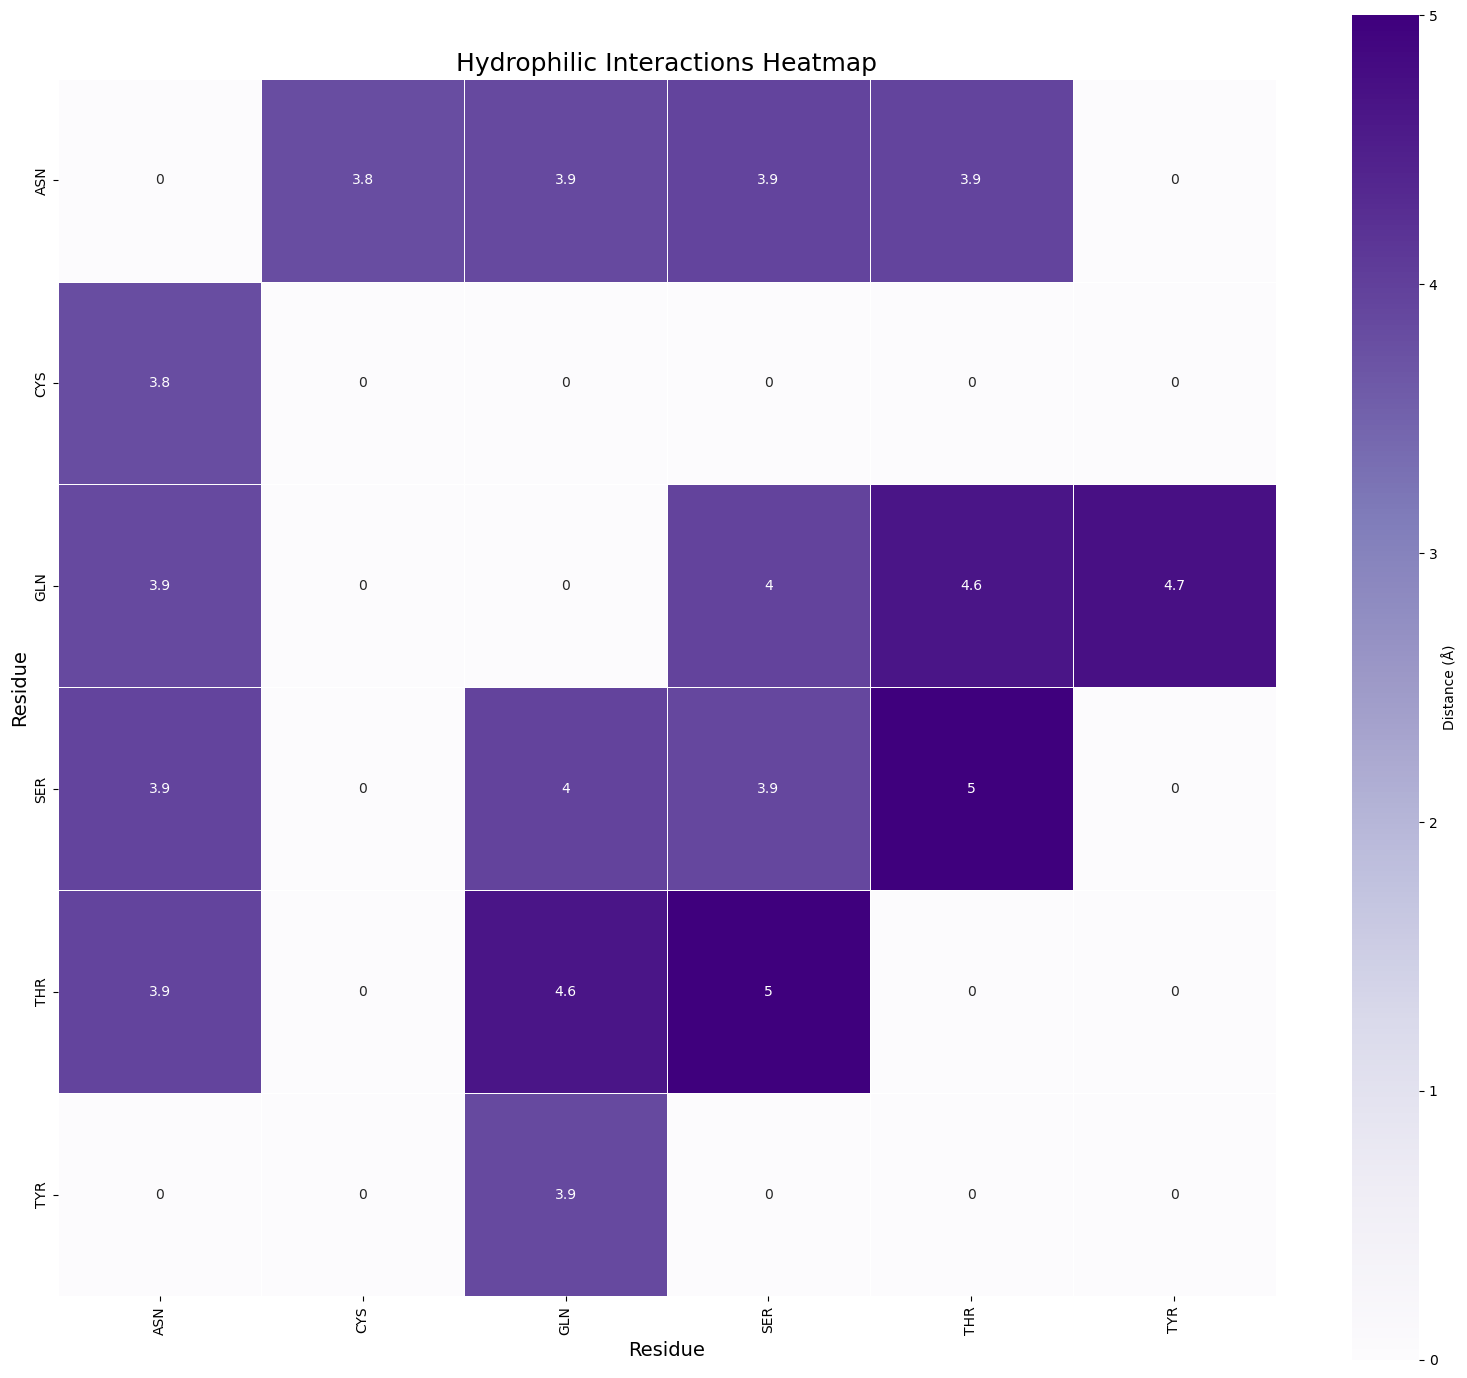

In [31]:
from Bio.PDB import PDBParser
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

def calculate_distance(res1, res2):
    """ Calculate the distance between the Cα atoms of two residues. """
    try:
        atom1 = res1['CA']
        atom2 = res2['CA']
        distance = atom1 - atom2
        print(f"Distance between {res1.get_resname()} and {res2.get_resname()}: {distance:.2f} Å")  # Debugging output
        return distance
    except KeyError:
        # Handle missing Cα atom gracefully
        print(f"Missing CA atom for {res1.get_resname()} or {res2.get_resname()}")
        return None

def find_hydrophobic_hydrophilic_interactions(pdb_file, hydrophobic_cutoff=5.0, hydrophilic_cutoff=5.0):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)

    hydrophobic_residues = {'ALA', 'VAL', 'LEU', 'ILE', 'MET', 'PHE', 'TRP', 'PRO'}
    hydrophilic_residues = {'SER', 'THR', 'ASN', 'GLN', 'TYR', 'CYS'}
    
    hydrophobic_interactions = {}
    hydrophilic_interactions = {}

    # Iterate over chains and residues
    for chain in structure[0]:
        hydrophobic_interactions[chain.id] = {}
        hydrophilic_interactions[chain.id] = {}

        for res1 in chain:
            for res2 in chain:
                if res1 == res2:
                    continue

                # Calculate the distance between the Cα atoms of the two residues
                distance = calculate_distance(res1, res2)
                if distance is None:  # Skip if no valid Cα atom
                    continue

                # Hydrophobic interaction
                if res1.resname in hydrophobic_residues and res2.resname in hydrophobic_residues:
                    if distance <= hydrophobic_cutoff:
                        hydrophobic_interactions[chain.id].setdefault(res1.resname, {}).update(
                            {res2.resname: distance}
                        )
                        print(f"Hydrophobic interaction: {res1.resname} <-> {res2.resname} at {distance:.2f} Å")  # Debugging output

                # Hydrophilic interaction
                elif res1.resname in hydrophilic_residues and res2.resname in hydrophilic_residues:
                    if distance <= hydrophilic_cutoff:
                        hydrophilic_interactions[chain.id].setdefault(res1.resname, {}).update(
                            {res2.resname: distance}
                        )
                        print(f"Hydrophilic interaction: {res1.resname} <-> {res2.resname} at {distance:.2f} Å")  # Debugging output

    return hydrophobic_interactions, hydrophilic_interactions

def save_interactions_to_txt(interactions, filename):
    """ Save interactions to a text file """
    with open(filename, 'w') as f:
        for chain_id, chain_interactions in interactions.items():
            f.write(f"Chain {chain_id}:\n")
            for res1, inter_dict in chain_interactions.items():
                for res2, distance in inter_dict.items():
                    f.write(f"{res1} <-> {res2}: {distance:.2f} Å\n")
            f.write("\n")

def generate_2d_heatmap(interactions, title, cmap, cutoff, save_path=None):
    if not interactions:
        print(f"No interactions found for {title}")
        return
    
    # Create a sorted list of unique residues involved in interactions
    residue_list = list(set([res for res_dict in interactions.values() for res in res_dict.keys()]))
    residue_list.sort()
    print(f"Residue list: {residue_list}")  # Debugging output

    # Create a mapping from residue names to matrix indices
    residue_to_index = {residue: idx for idx, residue in enumerate(residue_list)}
    print(f"Residue to index mapping: {residue_to_index}")  # Debugging output

    # Create an empty interaction matrix
    interaction_matrix = np.zeros((len(residue_list), len(residue_list)))

    # Fill the interaction matrix with distance values
    for chain_interactions in interactions.values():
        for res1, inter_dict in chain_interactions.items():
            for res2, distance in inter_dict.items():
                if res1 in residue_to_index and res2 in residue_to_index:
                    i = residue_to_index[res1]
                    j = residue_to_index[res2]
                    interaction_matrix[i, j] = distance
                    print(f"Matrix update: ({res1}, {res2}) = {distance:.2f} Å")  # Debugging output

    # Ensure the matrix is within proper value range for color mapping
    interaction_matrix[interaction_matrix > cutoff] = cutoff

    # Increase plot size for better visualization
    plt.figure(figsize=(16, 14))

    # Generate the heatmap using seaborn
    sns.heatmap(interaction_matrix, annot=True, cmap=cmap, xticklabels=residue_list, yticklabels=residue_list,
                cbar_kws={'label': 'Distance (Å)'}, square=True, linewidths=0.5, vmin=0, vmax=cutoff)

    # Set the title and axis labels
    plt.title(title, fontsize=18)
    plt.xlabel("Residue", fontsize=14)
    plt.ylabel("Residue", fontsize=14)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout for a tight fit

    # Save the heatmap as an image if a path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Heatmap saved as {save_path}")

    # Display the heatmap (ensures it shows in environments like Jupyter)
    plt.show()

# Main execution
pdb_file = "/home/hp/nayanika/github/GPX6/prep_structures/original_humansec.pdb"  # Provide the correct path

# Cutoff values for hydrophobic and hydrophilic interactions
hydrophobic_cutoff = 5.0
hydrophilic_cutoff = 5.0

# Find interactions for both hydrophobic and hydrophilic residues
hydrophobic_interactions, hydrophilic_interactions = find_hydrophobic_hydrophilic_interactions(pdb_file)

# Define the directory for saving the text file
table_dir = "/home/hp/nayanika/github/GPX6/table"

# Create the directory if it doesn't exist
os.makedirs(table_dir, exist_ok=True)

# Save interactions to text files
save_interactions_to_txt(hydrophobic_interactions, os.path.join(table_dir, "hydrophobic_interactions.txt"))
save_interactions_to_txt(hydrophilic_interactions, os.path.join(table_dir, "hydrophilic_interactions.txt"))

# Generate 2D heatmaps for hydrophobic and hydrophilic interactions
generate_2d_heatmap(hydrophobic_interactions, title="Hydrophobic Interactions Heatmap", cmap="Oranges",
                    cutoff=hydrophobic_cutoff, save_path="hydrophobic_2d_heatmap.png")

generate_2d_heatmap(hydrophilic_interactions, title="Hydrophilic Interactions Heatmap", cmap="Purples",
                    cutoff=hydrophilic_cutoff, save_path="hydrophilic_2d_heatmap.png")


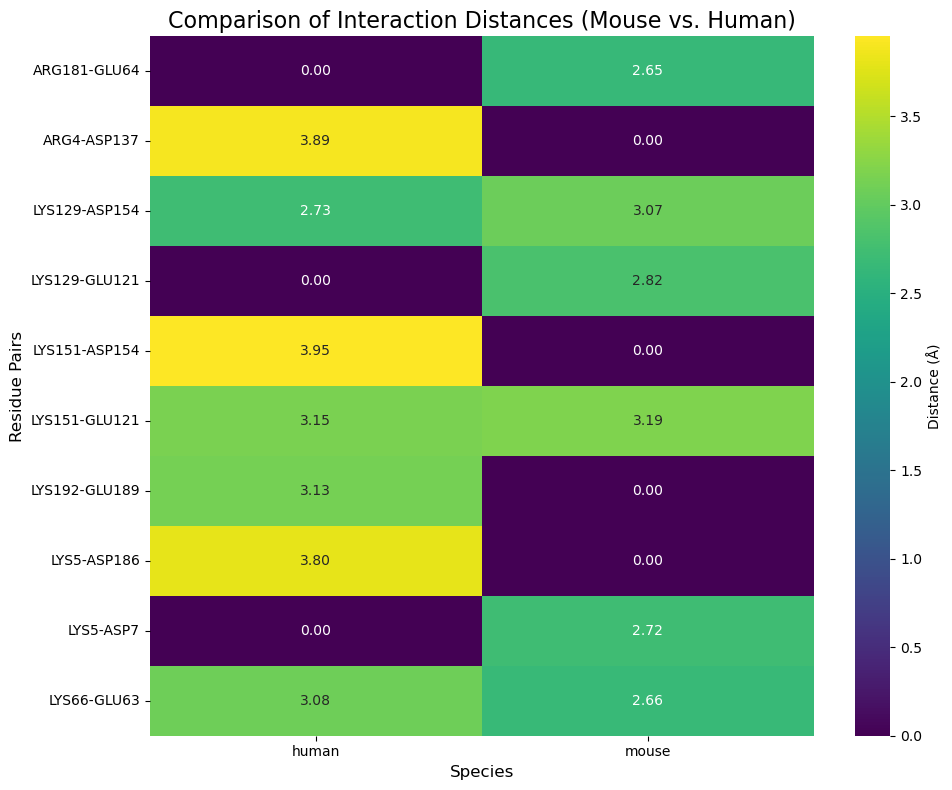

Heatmap saved to /home/hp/nayanika/github/GPX6/figures/heatmap.png


<Figure size 640x480 with 0 Axes>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the mouse and human text files
mouse_file = "/home/hp/nayanika/github/GPX6/table/salt_bridges_mouse.txt"  # Update the file path for the mouse data
human_file = "/home/hp/nayanika/github/GPX6/table/salt_bridges_human.txt"  # Update the file path for the human data

# Read the data into pandas DataFrames
mouse_data = pd.read_csv(mouse_file, sep='\t')
human_data = pd.read_csv(human_file, sep='\t')

# Create a combined DataFrame with both mouse and human data
mouse_data['species'] = 'mouse'
human_data['species'] = 'human'
combined_data = pd.concat([mouse_data, human_data], ignore_index=True)

# Create a pivot table for the heatmap (distance vs. residue pairs)
# We combine 'pos_res' and 'neg_res' into a single identifier for residue pairs
combined_data['residue_pair'] = combined_data['pos_res'] + '-' + combined_data['neg_res']

# Create a pivot table with 'residue_pair' as both rows and columns
distance_matrix = pd.pivot_table(
    combined_data, 
    values='distance', 
    index='residue_pair', 
    columns='species', 
    aggfunc='mean',  # You can use 'mean' or 'first' depending on how you want to aggregate multiple values
    fill_value=0  # Fill missing values with 0 (no interaction)
)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, annot=True, fmt='.2f', cmap='viridis', cbar_kws={'label': 'Distance (Å)'})
plt.title("Comparison of Interaction Distances (Mouse vs. Human)", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Residue Pairs", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()

# Optionally, save the heatmap
save_path = "/home/hp/nayanika/github/GPX6/figures/heatmap.png"  # Update the save path
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Heatmap saved to {save_path}")


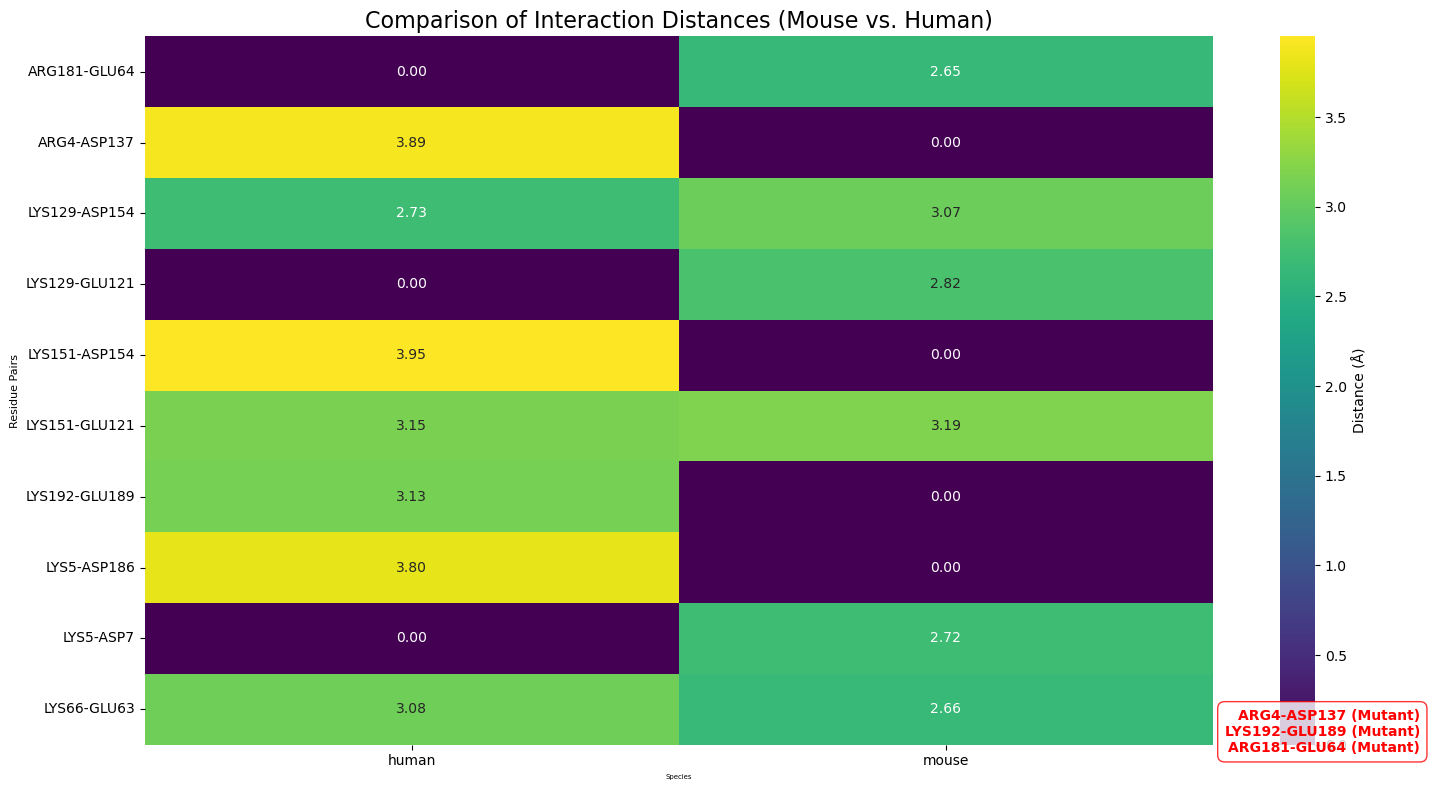

Heatmap saved to /home/hp/nayanika/github/GPX6/figures/heatmap_with_mutants_saltbridge_interaction
Distance Matrix DataFrame:
species        human  mouse
residue_pair               
ARG181-GLU64    0.00   2.65
ARG4-ASP137     3.89   0.00
LYS129-ASP154   2.73   3.07
LYS129-GLU121   0.00   2.82
LYS151-ASP154   3.95   0.00
LYS151-GLU121   3.15   3.19
LYS192-GLU189   3.13   0.00
LYS5-ASP186     3.80   0.00
LYS5-ASP7       0.00   2.72
LYS66-GLU63     3.08   2.66


<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the mouse and human text files
mouse_file = "/home/hp/nayanika/github/GPX6/table/salt_bridges_mouse.txt"  # Update the file path for the mouse data
human_file = "/home/hp/nayanika/github/GPX6/table/salt_bridges_human.txt"  # Update the file path for the human data

# Read the data into pandas DataFrames
mouse_data = pd.read_csv(mouse_file, sep='\t')
human_data = pd.read_csv(human_file, sep='\t')

# Create a combined DataFrame with both mouse and human data
mouse_data['species'] = 'mouse'
human_data['species'] = 'human'
combined_data = pd.concat([mouse_data, human_data], ignore_index=True)

# Create a pivot table for the heatmap (distance vs. residue pairs)
combined_data['residue_pair'] = combined_data['pos_res'] + '-' + combined_data['neg_res']

# Create a pivot table with 'residue_pair' as both rows and columns
distance_matrix = pd.pivot_table(
    combined_data, 
    values='distance', 
    index='residue_pair', 
    columns='species', 
    aggfunc='mean',  # You can use 'mean' or 'first' depending on how you want to aggregate multiple values
    fill_value=0  # Fill missing values with 0 (no interaction)
)

# Define the mutants to label
mutants = ['ARG4-ASP137', 'LYS192-GLU189', 'ARG181-GLU64']

# Plot the heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(distance_matrix, annot=True, fmt='.2f', cmap='viridis', cbar_kws={'label': 'Distance (Å)'})

# Add labels for the mutant interactions at the lower-right corner of the plot (outside the heatmap)
mutant_text = "\n".join([f"{mutant} (Mutant)" for mutant in mutants])

# Add the mutant label text in the lower-right corner of the plot
plt.figtext(
    0.95,  # x position in figure coordinates (0 to 1), near the right edge
    0.05,  # y position in figure coordinates (0 to 1), near the bottom edge
    mutant_text,  # The mutant labels text
    ha='right',  # Horizontal alignment (right-aligned)
    va='bottom',  # Vertical alignment (bottom-aligned)
    fontsize=10,  # Font size of the label
    color='red',  # Label color
    fontweight='bold',  # Font weight for emphasis
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': 'red', 'boxstyle': 'round,pad=0.5'}  # Background box
)

# Set plot title and labels
plt.title("Comparison of Interaction Distances (Mouse vs. Human)", fontsize=16)
plt.xlabel("Species", fontsize=5)
plt.ylabel("Residue Pairs", fontsize=8)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()

# Optionally, save the heatmap
save_path = "/home/hp/nayanika/github/GPX6/figures/heatmap_with_mutants_saltbridge_interaction"  # Update the save path
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Heatmap saved to {save_path}")
print("Distance Matrix DataFrame:")
print(distance_matrix)

✅ Heatmap saved to saltbridge_heatmap_humansec.png


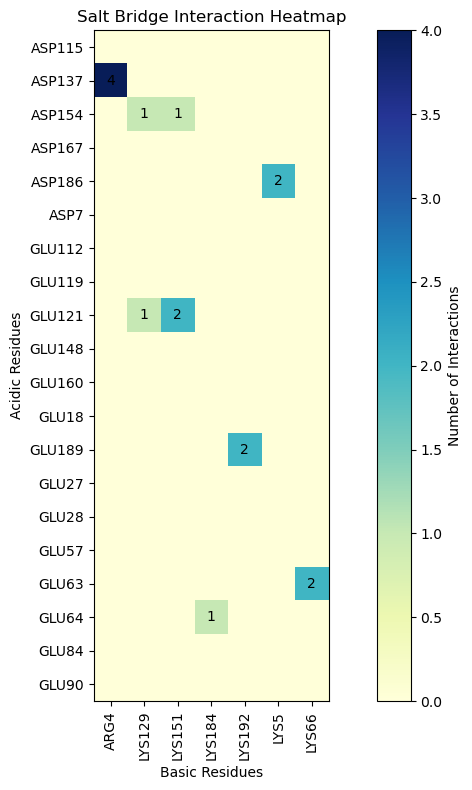

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Residue and atom definitions
acidic_residues = {'ASP': ['OD1', 'OD2'], 'GLU': ['OE1', 'OE2']}
basic_residues = {'ARG': ['NH1', 'NH2'], 'LYS': ['NZ'], 'HIS': ['ND1', 'NE2']}
cutoff_distance = 4.0  # Angstroms

def parse_pdb_atoms(pdb_file):
    atoms = []
    with open(pdb_file, 'r') as f:
        for line in f:
            if line.startswith("ATOM") or line.startswith("HETATM"):
                atom_name = line[12:16].strip()
                res_name = line[17:20].strip()
                chain_id = line[21]
                res_id = int(line[22:26])
                x = float(line[30:38])
                y = float(line[38:46])
                z = float(line[46:54])
                atoms.append({
                    'atom': atom_name,
                    'resname': res_name,
                    'chain': chain_id,
                    'resid': res_id,
                    'coord': np.array([x, y, z])
                })
    return atoms

def find_salt_bridges(atoms):
    acidic_atoms = [a for a in atoms if a['resname'] in acidic_residues and a['atom'] in acidic_residues[a['resname']]]
    basic_atoms = [a for a in atoms if a['resname'] in basic_residues and a['atom'] in basic_residues[a['resname']]]

    interaction_matrix = {}
    for a in acidic_atoms:
        a_id = f"{a['resname']}{a['resid']}"
        if a_id not in interaction_matrix:
            interaction_matrix[a_id] = {}

        for b in basic_atoms:
            b_id = f"{b['resname']}{b['resid']}"
            distance = np.linalg.norm(a['coord'] - b['coord'])
            if distance <= cutoff_distance:
                interaction_matrix[a_id][b_id] = interaction_matrix[a_id].get(b_id, 0) + 1

    return interaction_matrix

def save_heatmap(interactions, out_file='saltbridge_heatmap_humansec.png'):
    acidic_keys = sorted(interactions.keys())
    basic_keys = sorted({bk for ak in interactions for bk in interactions[ak]})
    data = np.zeros((len(acidic_keys), len(basic_keys)), dtype=int)

    for i, a in enumerate(acidic_keys):
        for j, b in enumerate(basic_keys):
            data[i, j] = interactions[a].get(b, 0)

    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.imshow(data, cmap='YlGnBu')

    # Annotate each cell
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i, j] > 0:
                ax.text(j, i, str(data[i, j]), ha='center', va='center', color='black')

    ax.set_xticks(np.arange(len(basic_keys)))
    ax.set_yticks(np.arange(len(acidic_keys)))
    ax.set_xticklabels(basic_keys, rotation=90)
    ax.set_yticklabels(acidic_keys)

    ax.set_xlabel('Basic Residues')
    ax.set_ylabel('Acidic Residues')
    ax.set_title('Salt Bridge Interaction Heatmap')
    fig.colorbar(cax, ax=ax, label='Number of Interactions')

    plt.tight_layout()
    plt.savefig(out_file)
    print(f"✅ Heatmap saved to {out_file}")

# Example usage
pdb_path = '/home/hp/nayanika/github/GPX6/prep_structures/original_humansec.pdb'
atoms = parse_pdb_atoms(pdb_path)
interactions = find_salt_bridges(atoms)
save_heatmap(interactions)
